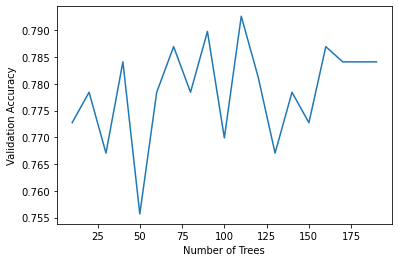

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

np.random.seed(0)

df = pd.read_csv('joe_dutch_bigram.csv', index_col='instance')

X_train, X_validation, y_train, y_validation = train_test_split(df.loc[:,df.columns != 'category'], df['category'], test_size=.2, random_state=0)

# Part a
scoresa = pd.DataFrame(dtype=float, index=[n for n in range(10, 200, 10)], columns=['Validation Accuracy'])
scoresa.index.name = 'Number of Trees'

max_accuracy = 0
for n in scoresa.index:
    rf = RandomForestClassifier(n_estimators=n).fit(X_train, y_train)
    accuracy = accuracy_score(y_validation, rf.predict(X_validation))
    scoresa.at[n, 'Validation Accuracy'] = accuracy
    if accuracy >= max_accuracy:
        max_accuracy = accuracy
        num_trees_tuned = n

sns.lineplot(data=scoresa['Validation Accuracy'])
plt.savefig(fname='Q10.6a.png')

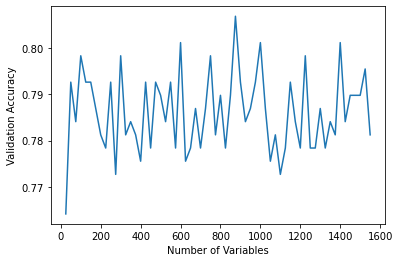

In [9]:
# Part b
scoresb = pd.DataFrame(dtype=float, index=[n for n in range(25, len(X_train.columns), 25)], columns=['Validation Accuracy'])
scoresb.index.name = 'Number of Variables'

max_accuracy = 0
for n in scoresb.index:
    rf = RandomForestClassifier(n_estimators=num_trees_tuned, max_features=n).fit(X_train, y_train)
    accuracy = accuracy_score(y_validation, rf.predict(X_validation))
    scoresb.at[n, 'Validation Accuracy'] = accuracy
    if accuracy >= max_accuracy:
        max_accuracy = accuracy
        num_var_tuned = n

sns.lineplot(data=scoresb['Validation Accuracy'])
plt.savefig(fname='Q10.6b.png')

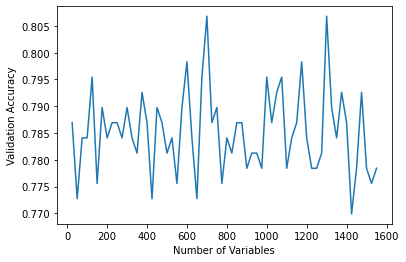

In [10]:
# Part c
scoresc = pd.DataFrame(dtype=float, index=[n for n in range(25, len(X_train.columns), 25)], columns=['Validation Accuracy'])
scoresc.index.name = 'Number of Variables'

max_accuracy = 0
for n in scoresc.index:
    rf = RandomForestClassifier(n_estimators=num_trees_tuned, criterion='entropy', max_features=n).fit(X_train, y_train)
    accuracy = accuracy_score(y_validation, rf.predict(X_validation))
    scoresc.at[n, 'Validation Accuracy'] = accuracy
    if accuracy >= max_accuracy:
        max_accuracy = accuracy
        num_var_tuned = n

sns.lineplot(data=scoresc['Validation Accuracy'])
plt.savefig(fname='Q10.6c.png')